<a href="https://colab.research.google.com/github/Gloou-ui/NM/blob/main/%D0%9B%D0%A0_5_%D0%A7%D0%9C_%D0%9C%D0%B8%D1%80%D0%BE%D1%81%D0%BB%D0%B0%D0%B2_%D0%9B%D0%B8%D1%82%D0%B2%D0%B8%D0%BD_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 5
Розв'язання систем рівнянь.

Зроблено на парі

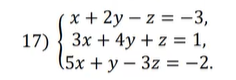

Метод Гауса

In [ ]:
import numpy as np

In [ ]:
# Матриця А та вектор b
a = np.array([
    [1, 2, -1],
    [3, 4, 1],
    [5, 1, -3],
])
b = np.array([[-3],[1],[-2]])

# Довжина списку
d = len(b)

# Прямий хід
for m in range(0,d-1):
    for j in range(m+1,d):
        k = a[j][m] / a[m][m]
        for i in range(m,d):
            a[j][i] = a[j][i] - k*a[m][i]
        b[j] = b[j] - k*b[m]

# Скалярний добуток
def scalar_product(a, b, n):
    s = 0
    for i in range(n+1, d):
        s = s + a[n][i]*b[i]
    return s

# Зворотний хід
for i in range(d-1, -1, -1):
    b[i] = (b[i] - scalar_product(a, b, i)) / a[i][i]

# Відображення результатів
print('Матриця А після перетворень прямого ходу')
for i in range(0,d):
    print(a[i])
print()
print("Вектор розв'язку x")
for i in range(0,d):
    print(b[i])

Матриця А після перетворень прямого ходу
[ 1  2 -1]
[ 0 -2  4]
[  0   0 -16]

Вектор розв'язку x
[1]
[-1]
[2]


In [ ]:
import numpy as np
from numpy.linalg import solve

a = np.array([
    [1, 2, -1],
    [3, 4, 1],
    [5, 1, -3],
])
b = np.array([[-3],[1],[-2]])

x = solve(a,b)

for i in range(len(x)):
    print(x[i])

[1.]
[-1.]
[2.]


In [ ]:
import sympy as sp

a = sp.Matrix([
    [1, 2, -1],
    [3, 4, 1],
    [5, 1, -3],
])
b = sp.Matrix([[-3],[1],[-2]])

x = a.solve(b)

print(x)

Matrix([[1], [-1], [2]])


In [ ]:
import sympy as sp

a11 = sp.symbols('a11')
a12 = sp.symbols('a12')
a21 = sp.symbols('a21')
a22 = sp.symbols('a22')
b1 = sp.symbols('b1')
b2 = sp.symbols('b2')

a = sp.Matrix([[a11, a12],
                 [a21, a22]])
b = sp.Matrix([b1, b2])
x = a.solve(b)

print(x)

Matrix([[(-a12*b2 + a22*b1)/(a11*a22 - a12*a21)], [(a11*b2 - a21*b1)/(a11*a22 - a12*a21)]])


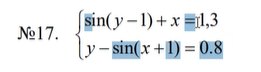

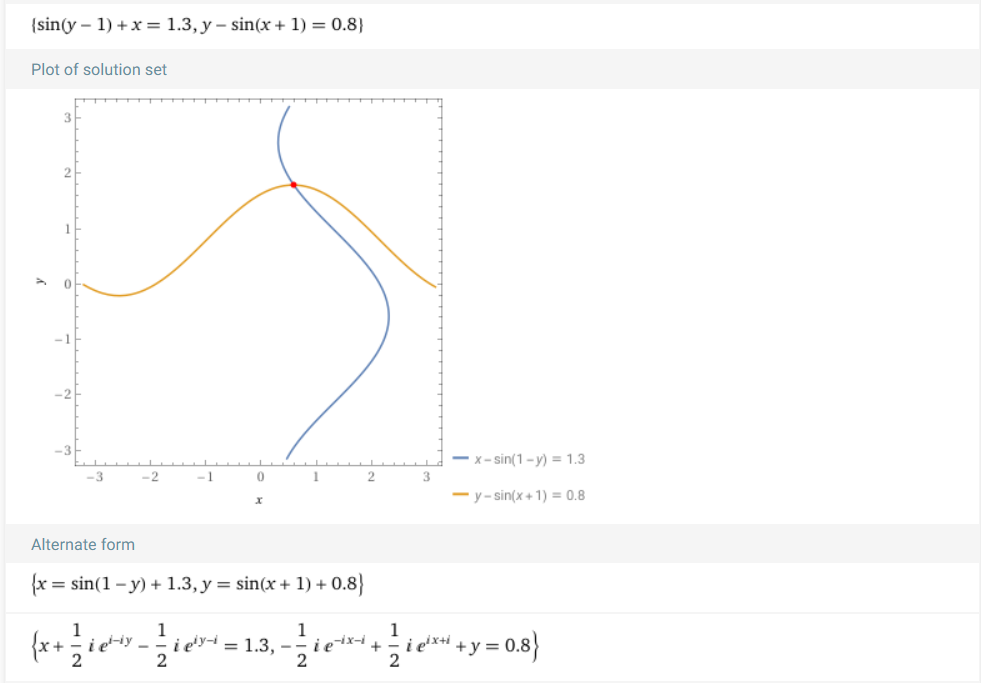

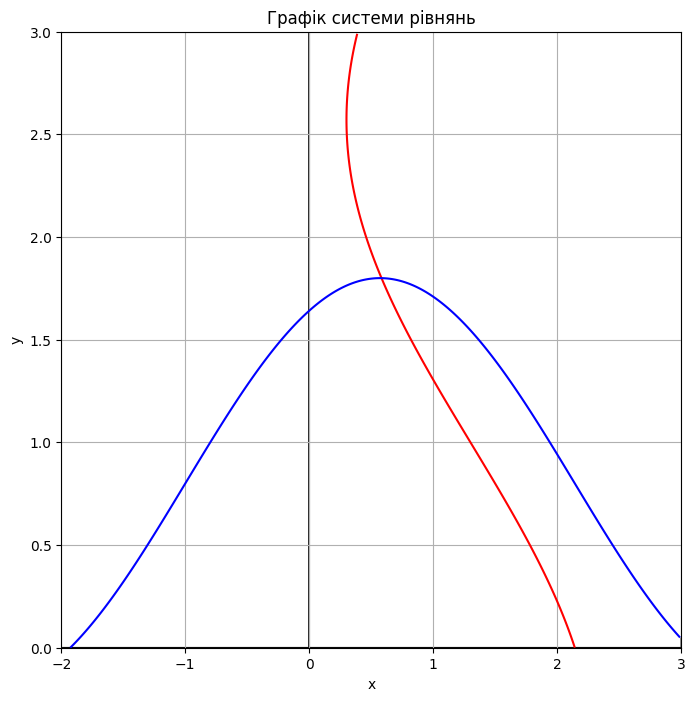

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Область значень для x та y
x_min, x_max = -2, 3
y_min, y_max = 0, 3
step = 0.01

# Створюємо масиви значень x та y
x, y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Рівняння системи
eq1 = np.sin(y - 1) + x - 1.3
eq2 = y - np.sin(x+1) - 0.8

# Створюємо графік
fig, ax = plt.subplots(figsize=(8, 8))

# Додаємо графік першого рівняння
ax.contour(x, y, eq1, levels=[0], colors='red')

# Додаємо графік другого рівняння
ax.contour(x, y, eq2, levels=[0], colors='blue')

# Налаштування графіка
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь')

# Додаємо стрілки на кінцях осей
ax.arrow(x_min, 0, x_max - x_min, 0, head_width=0.1, head_length=0.05, fc='black', ec='black')
ax.arrow(0, y_min, 0, y_max - y_min, head_width=0.1, head_length=0.2, fc='black', ec='black')

# Додаємо сітку
plt.grid(True)

# Показуємо графік
plt.show()


In [15]:
#Розв'язок системи рівнянь методом простої ітерації
import numpy as np
from scipy import optimize

x0, y0 = 0.5, 0.7

def f1(y):
    return 1.3 - np.sin(y-1)  #задаємо функції
def f2 (x):
    return np.sin(x + 1) + 0.8  #задаємо функції
#Перевірка методу на збіжність

def iter (x,y,e):
    xn = x
    yn = y
    xn1 = f2(x)
    yn1 = f1(y)
    n = 1
    while ((abs(xn1-xn)>=e) & (abs(yn1-yn) >=e)):
        xn = xn1
        yn = yn1
        xn1 = f2(yn)
        yn1 = f1(xn)
        n += 1
    print ('Simple iteration:')
    print ('x=', xn, '\ny=',yn,'\nThe amount of iteration = ',n)

iter(x0,y0,0.0001)

def f3(x): #Задаємо функцію для перевірки
    return np.sin(x[1] - 1) + x[0] - 1.3, x[1] - np.sin(x[0] + 1) - 0.8


s = optimize.root(f3, [0.,0.], method = 'hybr') #Перевірка розв*язку #Відповіді
#мають співпасти
print ('Chek',s.x)

Simple iteration:
x= 1.799929231374006 
y= 0.5845316834163857 
The amount of iteration =  8
Chek [0.58269321 1.79992923]
